In [7]:
!pip3 install arcgis

     |████████████████████████████████| 3.5 MB 3.5 MB/s eta 0:00:01
  Using cached keyring-21.7.0-py3-none-any.whl (32 kB)
  Using cached lerc-0.1.0-py3-none-any.whl
  Using cached python_certifi_win32-1.6-py2.py3-none-any.whl (7.2 kB)
  Using cached pyshp-2.1.3-py3-none-any.whl
  Using cached geomet-0.3.0-py3-none-any.whl (28 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached setuptools_scm-6.3.2-py3-none-any.whl (33 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Using cached tomli-2.0.0-py3-none-any.whl (12 kB)
  Created wheel for arcgis: filename=arcgis-1.9.1-py2.py3-none-any.whl size=3748927 sha256=024cb2528183c41a602272058e8d0b7fef197f3f5df3d1ee1ddbf9a46c0bbf87
  Stored in directory: /Users/yijianzong/Library/Caches/pip/wheels/d8/cb/d8/b1d656450840c5c1c7eb60ba647f15a9991e87af4d05c92907
Successfully built arcgis
  Attempting uninstall: keyring
    Found existing i

In [1]:
from layer_update import updateBuilding, ArcgisOperation
arcgis = ArcgisOperation()

login success


In [ ]:
gis_item = arcgis.getItemById('406b12a24ef64bfa9d8d8d2d9cab6987')
arcgis.cloneItem(gis_item)

<Item title:"polyBuildings_yizong" type:Feature Layer Collection owner:yizong_DSC180A>
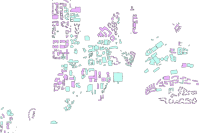

In [52]:
# arcgis.getItemById('2035a1d90d5242a19501f1d0e8c8e4a7')

<Item title:"multi_trace_layer" type:Feature Layer Collection owner:yizong_DSC180A>
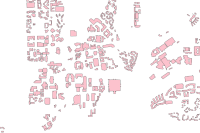

In [2]:
arcgis.contentSearch("yizong_DSC180A","multi_trace_layer")[0]

In [40]:
update_layer = arcgis.contentSearch(arcgis.arc_username,"TracedBuildings_oneday")[0].layers[1]
features_update = arcgis.getFeatures(update_layer)

In [3]:
building1_layer = arcgis.contentSearch(arcgis.arc_username,"multi_trace_layer")[0].layers[0]

In [3]:
historical_data_layer = arcgis.contentSearch(arcgis.arc_username,"historical_data_layer")[0].layers[0]

In [61]:
# h_features = arcgis.getFeatures(historical_data_layer)
h_features = historical_data_layer.query(where="Date= DATE '1/28/23'").features

In [62]:
for index in range(len(h_features)):
    if h_features[index].attributes['CAANtext'] == "7391":
        if h_features[index].attributes['NAME'] == "NTPLLN Ridgewalk - Public Engagement Building":
            h_features[index].attributes['CAANtext_INTERNAL'] = "7391a"
        else:
            h_features[index].attributes['CAANtext_INTERNAL'] = "7391b"
    else:
        h_features[index].attributes['CAANtext_INTERNAL'] = h_features[index].attributes['CAANtext']
historical_data_layer.edit_features(updates=h_features)

{'addResults': [],
 'updateResults': [{'objectId': 476785,
   'uniqueId': 476785,
   'globalId': None,
   'success': True},
  {'objectId': 476786, 'uniqueId': 476786, 'globalId': None, 'success': True},
  {'objectId': 476787, 'uniqueId': 476787, 'globalId': None, 'success': True},
  {'objectId': 476788, 'uniqueId': 476788, 'globalId': None, 'success': True},
  {'objectId': 476789, 'uniqueId': 476789, 'globalId': None, 'success': True},
  {'objectId': 476790, 'uniqueId': 476790, 'globalId': None, 'success': True},
  {'objectId': 476791, 'uniqueId': 476791, 'globalId': None, 'success': True},
  {'objectId': 476792, 'uniqueId': 476792, 'globalId': None, 'success': True},
  {'objectId': 476793, 'uniqueId': 476793, 'globalId': None, 'success': True},
  {'objectId': 476794, 'uniqueId': 476794, 'globalId': None, 'success': True},
  {'objectId': 476795, 'uniqueId': 476795, 'globalId': None, 'success': True},
  {'objectId': 476796, 'uniqueId': 476796, 'globalId': None, 'success': True},
  {'obj

In [7]:
# building1_layer.attributes["Monitored Status"]
features = arcgis.getFeatures(building1_layer)

In [53]:
type(features[:602])

list

In [58]:
object_ids = [str(f.get_value('OBJECTID')) for f in features[:602]]
object_ids_str = ",".join(object_ids)

In [12]:
features[index].attributes.keys()

dict_keys(['OBJECTID_1', 'NAME', 'CAANtext', 'addr', 'Monitored', 'Shape__Area', 'Shape__Length', 'Shape__Area_2', 'Shape__Length_2', 'Monitoring', 'Sampling', 'Detection', 'Status', 'Date', 'NewDate', 'CAAN_INTERNAL'])

In [24]:
for index in range(len(features)):
    if features[index].attributes['CAANtext_INTERNAL'] == "7391":
        print(features[index].attributes['NAME'])
        if features[index].attributes['NAME'] == "NTPLLN Ridgewalk - Public Engagement Building":
            features[index].attributes['CAANtext_INTERNAL'] = "7391a"
        else:
            features[index].attributes['CAANtext_INTERNAL'] = "7391b"
building1_layer.edit_features(updates=features)

NTPLLN Ridgewalk - Public Engagement Building
NTPLLN Ridgewalk - Arts & Humanities


{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True},
  {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True},
  {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True},
  {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True},
  {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True},
  {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True},
  {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True},
  {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True},
  {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True},
  {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True},
  {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True},
  {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True},
  {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True},
  {'objectId': 14, 'uniqueId': 14, 'globalId': Non

In [20]:
for index in range(len(features)):
     features[index].attributes['CAANtext_INTERNAL'] = features[index].attributes['CAANtext']
building1_layer.edit_features(updates=features)

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True},
  {'objectId': 2, 'uniqueId': 2, 'globalId': None, 'success': True},
  {'objectId': 3, 'uniqueId': 3, 'globalId': None, 'success': True},
  {'objectId': 4, 'uniqueId': 4, 'globalId': None, 'success': True},
  {'objectId': 5, 'uniqueId': 5, 'globalId': None, 'success': True},
  {'objectId': 6, 'uniqueId': 6, 'globalId': None, 'success': True},
  {'objectId': 7, 'uniqueId': 7, 'globalId': None, 'success': True},
  {'objectId': 8, 'uniqueId': 8, 'globalId': None, 'success': True},
  {'objectId': 9, 'uniqueId': 9, 'globalId': None, 'success': True},
  {'objectId': 10, 'uniqueId': 10, 'globalId': None, 'success': True},
  {'objectId': 11, 'uniqueId': 11, 'globalId': None, 'success': True},
  {'objectId': 12, 'uniqueId': 12, 'globalId': None, 'success': True},
  {'objectId': 13, 'uniqueId': 13, 'globalId': None, 'success': True},
  {'objectId': 14, 'uniqueId': 14, 'globalId': Non

In [6]:
feat_list = [feat.attributes['Monitored'] for feat in features]
update_list = [feat.attributes['Monitored'] for feat in features_update]

In [7]:
feat_list == update_list

True

In [8]:
len(feat_list)

602

In [86]:
feat_list[0]

'7257'

In [87]:
[idx for idx, value in enumerate(update_list) if feat_list[idx] != value]

[]

In [4]:
Monitoring = {
   "name": "Monitoring",
   "type": "esriFieldTypeString",
   "alias": "Monitoring",
   "sqlType": "sqlTypeOther",
   "length": 100,
   "nullable": True,
   "editable": True,
   "domain": None,
   "defaultValue": None
 }
Sampling =  {
   "name": "Sampling",
   "type": "esriFieldTypeString",
   "alias": "Sampling",
   "sqlType": "sqlTypeOther",
   "length": 100,
   "nullable": True,
   "editable": True,
   "domain": None,
   "defaultValue": None
 }
Detection =  {
   "name": "Detection",
   "type": "esriFieldTypeString",
   "alias": "Detection",
   "sqlType": "sqlTypeOther",
   "length": 100,
   "nullable": True,
   "editable": True,
   "domain": None,
   "defaultValue": None
 }
Status =  {
   "name": "Status",
   "type": "esriFieldTypeString",
   "alias": "Status",
   "sqlType": "sqlTypeOther",
   "length": 100,
   "nullable": True,
   "editable": True,
   "domain": None,
   "defaultValue": None
 }
Date =   {
   "name": "Date",
   "type": "esriFieldTypeDate",
   "alias": "Date",
   "sqlType": "sqlTypeOther",
   "length": 8,
   "nullable": True,
   "editable": True,
   "domain": None,
   "defaultValue": None
 }
CAANtext_INTERNAL =  {
   "name": "CAANtext_INTERNAL",
   "type": "esriFieldTypeString",
   "alias": "CAANtext_INTERNAL",
   "sqlType": "sqlTypeOther",
   "length": 100,
   "nullable": True,
   "editable": True,
   "domain": None,
   "defaultValue": None
 }

In [5]:
arcgis.addField([CAANtext_INTERNAL],historical_data_layer)

{'success': True}

<Item title:"Buildings_one_day" type:Feature Layer Collection owner:yizong_DSC180A>
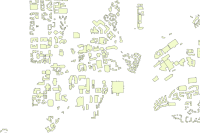

In [46]:
arcgis.contentSearch(arcgis.arc_username,"Buildings_one_day")[0]

In [70]:
updateBuilding("2/1")

login success


IndexError: list index out of range

In [41]:
update_layer.properties.fields

[{
   "name": "OBJECTID",
   "type": "esriFieldTypeOID",
   "alias": "OBJECTID",
   "sqlType": "sqlTypeOther",
   "nullable": false,
   "editable": false,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "NAME",
   "type": "esriFieldTypeString",
   "alias": "Name",
   "sqlType": "sqlTypeOther",
   "length": 100,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "CAANtext",
   "type": "esriFieldTypeString",
   "alias": "CAAN ID",
   "sqlType": "sqlTypeOther",
   "length": 254,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "addr",
   "type": "esriFieldTypeString",
   "alias": "Address",
   "sqlType": "sqlTypeOther",
   "length": 64,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "Monitored",
   "type": "esriFieldTypeString",
   "alias": "Monitored Status",
   "sqlType": "sqlTypeOther",
   "length": 255,
   "nulla

In [1]:
from trace import Trace

trace_obj = Trace()
trace_obj.read_sheet()

,SamplerID,ManholeID,Building(s),Area,Residential,11/23,11/24,11/25,11/26,11/27,...,4/24/23,4/25/23,4/26/23,4/27/23,4/28/23,5/1/23,5/2/23,5/3/23,5/4/23,5/5/23
0,AS009,C1M031,"Revelle: Blake, Argo, Urey Hall",Revelle,Residential,-1.000,-1.000,-1.000,-1.000,-1.000,...,38.782,37.435,-1.000,-1.000,38.260,-1.000,-1.000,38.179,-1.000,-1.000
1,AS010,C1M057,"Muir: Tamarack E, Tamarack W, Tuolumne T East,...",Muir,Residential,-1.000,34.159,29.311,30.418,28.506,...,38.194,-1.000,,-1.000,-1.000,-1.000,,-1.000,39.022,
2,AS064,C1M059,"Muir: Tuolumne S North, Tuolumne S West, Tuolu...",Muir,Residential,37.675,-1.000,-1.000,-1.000,-2.000,...,-1,-1,-1,-1,-1,-1,-1,37.94355774,38.7798233,-1
3,AS014,C1M060,"Muir: Tenaya, Roots and Pines, Roots and Pines...",Muir,Residential,-1.000,-1.000,-1.000,-1.000,-1.000,...,,,,,,,,,,
4,AS012,C2M015,Rita Atkinson Residences,School of Medicine,Residential,36.902,-2.000,32.854,33.021,33.895,...,38.23,30.63,,,38.17,36.12,35.13,,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,AS158,SC0085,Torrey Pines Center North,,Non-Residential,,,,,,...,,,,,,,,,,
144,ECEC01,SC0760,Early Childhood Education Center,,Non-Residential,,,,,,...,,,,,,,,,,
145,ECEC02,SC0970,Early Childhood Education Center,,Non-Residential,,,,,,...,,,,,,,,,,
146,ASJMC001,C4M072,Medical Center,,,,,,,,...,33.974,36.493,-1.000,,,,,,,


In [2]:
import json
haha = json.dumps(drop)
type(haha)

NameError: name 'drop' is not defined

In [8]:
import requests
requests.post('https://4jzevgh86d.execute-api.us-east-1.amazonaws.com/default/traceAPI',
                  data='{"password": "Open, sesame","date":"3/4","mode":"drop"}',
                  headers={"Content-Type":"application/json"})

In [3]:
import requests
import json
r = requests.post('http://34.68.95.12:8080/query',
                  data='{"query": "query getQpcrCqs($startDate: Time!, $endDate: Time!) { getQpcrCqs(startDate: $startDate, endDate: $endDate) { date manholeID samplerID cqValue } }", "variables": {"startDate": "2023-03-14T00:00:00.000Z", "endDate": "2023-03-21T00:00:00.000Z"}}',
                  headers={"Content-Type":"application/json"})
r_json = r.json()
r_json

{'data': {'getQpcrCqs': [{'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M022',
    'samplerID': 'AS078',
    'cqValue': -1},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M024',
    'samplerID': 'AS075',
    'cqValue': 35.29391300949248},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M028B',
    'samplerID': 'AS089',
    'cqValue': -1},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M031',
    'samplerID': 'AS009',
    'cqValue': -1},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M039',
    'samplerID': 'AS088',
    'cqValue': -1},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M049',
    'samplerID': 'AS090',
    'cqValue': -1},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M053',
    'samplerID': 'AS091',
    'cqValue': -1},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M053A',
    'samplerID': 'AS092',
    'cqValue': -1},
   {'date': '2023-03-14T00:00:00Z',
    'manholeID': 'C1M057',
    'samplerID': 'AS010',


In [4]:
r_json = r_json['data']['getQpcrCqs']
r_json

[{'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M022',
  'samplerID': 'AS078',
  'cqValue': -1},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M024',
  'samplerID': 'AS075',
  'cqValue': 35.29391300949248},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M028B',
  'samplerID': 'AS089',
  'cqValue': -1},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M031',
  'samplerID': 'AS009',
  'cqValue': -1},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M039',
  'samplerID': 'AS088',
  'cqValue': -1},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M049',
  'samplerID': 'AS090',
  'cqValue': -1},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M053',
  'samplerID': 'AS091',
  'cqValue': -1},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M053A',
  'samplerID': 'AS092',
  'cqValue': -1},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M057',
  'samplerID': 'AS010',
  'cqValue': 35.20726234169793},
 {'date': '2023-03-14T00:00:00Z',
  'manholeID': 'C1M060',


In [5]:
import pandas as pd
db_df = pd.DataFrame.from_dict(r_json)
dates = db_df['date'].unique()

df= pd.pivot_table(db_df,index=['manholeID'], columns='date',values='cqValue', fill_value=0)

In [6]:
df

date,2023-03-14T00:00:00Z,2023-03-15T00:00:00Z,2023-03-16T00:00:00Z,2023-03-17T00:00:00Z,2023-03-20T00:00:00Z,2023-03-21T00:00:00Z
manholeID,,,,,,
C1M022,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
C1M024,35.293913,-1.000000,-1.000000,-1.000000,-1.000000,35.332618
C1M028B,-1.000000,0.000000,32.997719,0.000000,-1.000000,29.380472
C1M031,-1.000000,-1.000000,37.222745,0.000000,35.356405,36.224568
C1M039,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...
SC0348,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
SC0688,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
SMISC-027,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [7]:
import datetime
df.columns = [datetime.datetime.fromisoformat(i.replace("Z", "+00:00")).strftime("%m/%d/%y") for i in df.columns]

In [8]:
df = df.reset_index()
df.rename(columns = {"manholeID": "ManholeID"}, inplace=True)

In [9]:
df

,ManholeID,03/14/23,03/15/23,03/16/23,03/17/23,03/20/23,03/21/23
0,C1M022,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,C1M024,35.293913,-1.000000,-1.000000,-1.000000,-1.000000,35.332618
2,C1M028B,-1.000000,0.000000,32.997719,0.000000,-1.000000,29.380472
3,C1M031,-1.000000,-1.000000,37.222745,0.000000,35.356405,36.224568
4,C1M039,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...
104,SC0348,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
105,SC0688,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000
106,SMISC-027,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
107,SMISC-079,26.642989,30.343421,28.748455,29.182008,35.070188,32.583782


In [ ]:
def calculateMetrics():
    return 

In [10]:
trace_obj.df = df

In [11]:
trace_obj.get_affected_buildings('03/21/23')

barriers,  {'SC0348', 'C6M075', 'C6M042', 'C3M097', 'C4M083', 'C6M078', 'C3M149', 'C6M043', 'C4M055F', 'C6M095', 'SMISC-027', 'C1M022', 'C1M049', 'C1M039', 'C6M034', 'SC0322', 'C6M079', 'C3M206', 'C3M091', 'S1M045', 'C3M159', 'C3M049B', 'C7M030', 'S1M019', 'C2M032', 'C3M143', 'C4M045', 'C3M022', 'C3M108', 'C4M072', 'C6M072', 'C2M005A', 'C7M008', 'C3M027', 'C6M046', 'C7M031', 'C6M011', 'S2M003', 'S2M015', 'C2M003', 'C3M006', 'C2M008A', 'C6M041', 'C6M012', 'C3M146', 'C3M170', 'S2M017', 'C6M088', 'C6M045', 'C2M006A', 'C6M047', 'C7M032', 'C1M060', 'C5M008', 'S1M046', 'C4M010', 'C4M023', 'C1M053', 'C1M053A', 'C3M007', 'C6M094', 'S2M001A', 'C6M030', 'C6M097', 'SMISC-080', 'C3M008', 'C4M031', 'SC0688', 'C3M026', 'SC0157'}
trace UCSD IDs for manholes 0        SC0010
1        SC0023
2        SC0154
3        SC0157
4        SC0170
         ...   
1620     C4M076
1621     C4M075
1622     C4M074
1623     C4M073
1624    SANFORD
Name: UCSD_ID, Length: 1625, dtype: object


(None,
 ['7201',
  '7392',
  '6450',
  '7150',
  '7188',
  '6666',
  '7374',
  '7100',
  '6352',
  '6697',
  '6501',
  '7152',
  '7215',
  '7220',
  '7222',
  '7022',
  '7026',
  '7050',
  '6999',
  '7014',
  '7229',
  '7191',
  '6820',
  '7041',
  '6143',
  '7249',
  '7223',
  '7018',
  '7154',
  '6507',
  '7199',
  '6608',
  '6115',
  '7183',
  '6606',
  '6615',
  '7262',
  '7156',
  '7162',
  '6661',
  '7115',
  '7157',
  '6605',
  '7333',
  '7004',
  '7221',
  '7012',
  '7044',
  '7042',
  '7151',
  '6176',
  '7194',
  '7153',
  '7033',
  '7149',
  '7276',
  '6602',
  '7331',
  '7189',
  '7190',
  '7025',
  '7187',
  '6923',
  '6988',
  '7224',
  '7161',
  '7192',
  '7264',
  '7023',
  '7007',
  '7256',
  '7019',
  '7373',
  '6358',
  '7136',
  '7015',
  '6131',
  '7116',
  '6830',
  '7043',
  '7010',
  '7255',
  '6336',
  '7024',
  '7009',
  '7127',
  '7391a',
  '7118',
  '6498',
  '6361',
  '7198',
  '6689',
  '7006',
  '7002',
  '6162',
  '7101',
  '6548',
  '7225',
  '6334',
  

In [12]:
requests.get("http://18.189.195.9:3002/",params={'date':'03/06/21'}).text

KeyboardInterrupt: 

In [21]:
lines = json.loads(r.text).splitlines()
lines

['SAMPLE_ID,MANHOLE_ID,BUILDING,CQ,TEST_DATE',
 'AS009,C1M031,"Blake, Argo, Urey",37.343,2/19/2021',
 'AS029,C3M149,Marshall:Lower and Upper,30.785,2/19/2021',
 'AS062,C3M152,Marshall:Lower and Upper,32.429,2/19/2021',
 'AS063,C3M158,Marshall:Lower and Upper,30.042,2/19/2021',
 'AS060,C3M159,Marshall:Lower and Upper,35.31,2/19/2021',
 'AS072,C3M008,Pepper Canyon,37.229,2/19/2021',
 'AS017,C6M094,Nuevo East Piedra,30.879,2/19/2021',
 'AS019,C6M095,NUEVO EAST (ISOLATION),,2/19/2021',
 'AS020,C6M097,NUEVO EAST (ISOLATION),,2/19/2021',
 'AS021,C6M098,NUEVO EAST (ISOLATION),37.244,2/19/2021',
 'AS082,C6M012,Central and South Mesa,37.27,2/19/2021',
 'AS081,C6M011,Central and South Mesa,34.042,2/19/2021',
 'AS080,C6M010,Central and South Mesa,36.196,2/19/2021',
 'AS022,C7M012,Seventh,36.309,2/19/2021',
 'AS079,C1M021,Revelle,,2/19/2021',
 'AS077,C1M106,Revelle,37.1,2/19/2021',
 'AS089,C1M028B,York Hall,37.396,2/19/2021',
 'AS119,C3M049A,Cellular and Molecular Medicine ,34.627,2/19/2021']

In [25]:
with open('file_today.csv','w') as f:
    f.write(json.loads(r.text))

In [26]:
import pandas as pd
pd.read_csv('file_today.csv')

,SAMPLE_ID,MANHOLE_ID,BUILDING,CQ,TEST_DATE
0,AS009,C1M031,"Blake, Argo, Urey",37.343,2/19/2021
1,AS029,C3M149,Marshall:Lower and Upper,30.785,2/19/2021
2,AS062,C3M152,Marshall:Lower and Upper,32.429,2/19/2021
3,AS063,C3M158,Marshall:Lower and Upper,30.042,2/19/2021
4,AS060,C3M159,Marshall:Lower and Upper,35.310,2/19/2021
5,AS072,C3M008,Pepper Canyon,37.229,2/19/2021
6,AS017,C6M094,Nuevo East Piedra,30.879,2/19/2021
7,AS019,C6M095,NUEVO EAST (ISOLATION),NaN,2/19/2021
8,AS020,C6M097,NUEVO EAST (ISOLATION),NaN,2/19/2021
9,AS021,C6M098,NUEVO EAST (ISOLATION),37.244,2/19/2021


In [11]:
! curl --header "Content-Type:application/json"        --request POST        --data '{"password": "Open, sesame","date":"2/19","mode":"drop"}' \https://4jzevgh86d.execute-api.us-east-1.amazonaws.com/default/traceAPI

"SAMPLE_ID,MANHOLE_ID,BUILDING,CQ,TEST_DATE\nAS009,C1M031,\"Blake, Argo, Urey\",37.343,2/19/2021\nAS029,C3M149,Marshall:Lower and Upper,30.785,2/19/2021\nAS062,C3M152,Marshall:Lower and Upper,32.429,2/19/2021\nAS063,C3M158,Marshall:Lower and Upper,30.042,2/19/2021\nAS060,C3M159,Marshall:Lower and Upper,35.31,2/19/2021\nAS072,C3M008,Pepper Canyon,37.229,2/19/2021\nAS017,C6M094,Nuevo East Piedra,30.879,2/19/2021\nAS019,C6M095,NUEVO EAST (ISOLATION),,2/19/2021\nAS020,C6M097,NUEVO EAST (ISOLATION),,2/19/2021\nAS021,C6M098,NUEVO EAST (ISOLATION),37.244,2/19/2021\nAS082,C6M012,Central and South Mesa,37.27,2/19/2021\nAS081,C6M011,Central and South Mesa,34.042,2/19/2021\nAS080,C6M010,Central and South Mesa,36.196,2/19/2021\nAS022,C7M012,Seventh,36.309,2/19/2021\nAS079,C1M021,Revelle,,2/19/2021\nAS077,C1M106,Revelle,37.1,2/19/2021\nAS089,C1M028B,York Hall,37.396,2/19/2021\nAS119,C3M049A,Cellular and Molecular Medicine ,34.627,2/19/2021\n"

In [12]:
import os
os.chmod('./sftpsync.sh', 0o755)

In [10]:
import subprocess
subprocess.call(["./sftpsync.sh",'-i','../yjkeygoanywhere','-u','cUCSDHS_WW','-S','../data',
                '-H','its-mft.ucsd.edu','-R','HS_COVID_WW_MB'])

1

In [2]:
tracing.mh_graph.df_manhole

,UCSD_ID,TYPE,IE,SDRSD,INSTALL_DA,AS_BUILT,INFO_SOURC,NOTES,UCSD_ID_1,STATUS,geometry
0,SC0010,Sewer Type Cleanout,0.0,SC-01,1996-08-12,https://facilities.ucsd.edu/Drawings/Home/Shee...,None,N/A,SC0010,Active,POINT (6254346.063 1897646.232)
1,SC0023,Sewer Type Cleanout,0.0,SC-01,1969-12-01,https://facilities.ucsd.edu/Drawings/home/shee...,None,DOES NOT SAY SEWER BUT MARKED WITH GREEN,SC0023,Active,POINT (6254112.614 1897005.832)
2,SC0154,Sewer Type Cleanout,0.0,SC-01,1992-10-22,https://facilities.ucsd.edu/Drawings/Home/Shee...,None,N/A,SC0154,Active,POINT (6257870.856 1903205.945)
3,SC0157,Sewer Type Cleanout,0.0,SC-01,2009-06-30,https://facilities.ucsd.edu/Drawings/Home/Shee...,None,N/A,SC0157,Active,POINT (6257878.972 1903111.768)
4,SC0170,Sewer Type Cleanout,0.0,SC-01,1989-05-01,https://facilities.ucsd.edu/Drawings/Home/Shee...,None,N/A,SC0170,Active,POINT (6257613.342 1903852.741)
...,...,...,...,...,...,...,...,...,...,...,...
1617,SMISC-078,None,0.0,None,2018-04-20,https://facilities.ucsd.edu/Drawings/Home/Shee...,None,None,None,None,POINT (6263373.993 1901577.624)
1618,SMISC-081,None,0.0,None,None,North Torrey Pines Living & Learning Neighborh...,1,None,None,None,POINT (6257424.955 1901341.314)
1619,SMISC-082,None,0.0,None,None,North Torrey Pines Living & Learning Neighborh...,1,None,None,None,POINT (6257410.185 1901342.862)
1620,SMISC-083,None,0.0,None,None,North Torrey Pines Living & Learning Neighborh...,1,None,None,None,POINT (6257299.462 1901774.890)


In [ ]:
coord_set = set()
for index, row in tracing.mh_graph.df_pipe.iterrows():
    for idx in range(0,len(row['geometry'].coords)):
        coord_set.add(row['geometry'].coords[idx])
coord_set

In [79]:
tracing.exportDropIn("3/5/2021")

dropin csv has been saved to the tmp folder


/Users/yijianzong/Documents/GitHub/BuildingTrace/src/trace.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_in['CQ'] = waste_df[date_value]
/Users/yijianzong/Documents/GitHub/BuildingTrace/src/trace.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_in['TEST_DATE'] = date_str


(None, '/tmp/dropin3520212021.csv')

In [5]:
from trace import autoPilot

In [2]:
import pandas as pd
test_result = pd.read_excel("BuildingStatus0406.xls")

In [3]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

In [4]:
test_result['CAANtext'] = test_result['CAANtext'].apply(lambda x: str(int(x)) if RepresentsInt(x) else str(x))
test_result['CAANtext']

0      6143
1      6361
2      6353
3      6352
4      6358
       ... 
489    6252
490    6266
491    7275
492    7373
493    7394
Name: CAANtext, Length: 494, dtype: object

## Test Trace -- Detect

In [16]:
import geopandas
"RITTER" in set(geopandas.read_file('../data/network/MergedSewerVertices.shp')['UCSD_ID'])

True

In [17]:
sewer_data = geopandas.read_file('../data/network2/SewerPipe.shp')
list(sewer_data[sewer_data['UCSD_ID']=="S01668"]['geometry'].iloc[0].coords)

[(-13052600.8393, 3877427.1777999997),
 (-13052600.8827, 3877421.5447999984),
 (-13052643.4592, 3877423.269699998),
 (-13052643.4749, 3877423.2704000026)]

In [5]:
from traceGraph import TraceGraph 
gg = TraceGraph()
gg.buildGraph()

In [20]:
gg.manhole_to_coords_map['RITTER']

(-13052600.8827, 3877421.5447999984)

In [25]:
'6129' in set(geopandas.read_file('../data/network/Sewer_Buildings.shp')['CAANtext'])

True

In [49]:
gg.edges[(6259550.634646505, 1901445.523864925)]

{(6259567.150033429, 1901328.3682593405)}

In [44]:
gg.edges[(6259167.602276087, 1901518.7678129226)]

set()

In [51]:
gg.graph["S01034"]

set()

In [6]:
test_detected = list(test_result[test_result['Detection'] == True]['CAANtext'])

In [7]:
res_detected = autoPilot("4/6/21")[1]

['C3M041', 'C6M025', 'C6M094', 'C6M033', 'C7M025', 'C1M107', 'C3M049A']


In [8]:
set(test_detected) == set(res_detected)

True

In [9]:
test_result.columns

Index(['NAME', 'CAANtext', 'addr', 'Monitoring', 'Sampling', 'Detection',
       'Status'],
      dtype='object')

In [11]:
test_mon = list(test_result[test_result['Monitoring'] == True]['CAANtext'])
_, mon_res = autoPilot("4/6/21",mode="monitoring")
set(test_mon) == set(mon_res), len(set(test_mon)), len(set(mon_res))

['C1M031', 'C1M057', 'C1M059', 'C1M060', 'C2M015', 'C3M039', 'C3M041', 'C3M042', 'C3M149', 'C3M150', 'C3M152', 'C3M158', 'C3M159', 'C3M097', 'C3M095', 'C3M091', 'C3M026', 'C3M027', 'C3M008', 'C3M010', 'C3M022', 'C6M021', 'C6M025', 'C6M088', 'C6M092', 'C6M094', 'C6M095', 'C6M097', 'C6M098', 'C6M075', 'C6M072', 'C6M079', 'C6M078', 'C6M099', 'C6M031', 'C6M033', 'C6M034', 'C6M041', 'C6M042', 'C6M043', 'C6M045', 'C6M046', 'C6M047', 'C6M049', 'C6M030', 'C6M012', 'C6M011', 'C6M010', 'C7M005', 'C7M008', 'C7M012', 'C7M017', 'C7M024', 'C7M025', 'C7M027', 'C7M030', 'C7M031', 'C7M032', 'C1M161', 'SMISC-079', 'SMISC-080', 'S2M015', 'S2M016', 'S2M017', 'C1M021', 'C1M106', 'C1M107', 'C1M024', 'C1M022', 'C1M039', 'C2M008A', 'C2M006A', 'C2M003', 'C5M008', 'C2M005A', 'C1M028B', 'C1M049', 'C1M053', 'C1M053A', 'C3M108', 'C3M109', 'C3M206', 'C3M187', 'C4M086', 'C4M010', 'SC0010', 'S1M019', 'SC0812', 'SC0023', 'S1M046', 'S1M045', 'RITTER', 'S1M007', 'S2M001A', 'S2M003', 'C3M049B', 'C3M210', 'C3M049A', 'C2M0

(False, 340, 339)

In [12]:
set(mon_res) - set(test_mon)

set()

In [13]:
set(test_mon) - set(mon_res)

{'nan'}

In [12]:
test_sample = list(test_result[test_result['Sampling'] == True]['CAANtext'])
_, sample_res = autoPilot("4/6/21",mode="sampling")
set(test_sample) == set(sample_res), len(set(test_sample)),len(set(sample_res))

(False, 311, 310)

In [13]:
set(sample_res)-set(test_sample)

set()

In [14]:
set(test_sample)-set(sample_res)

{'nan'}

### trace based on sewer pipe name

In [11]:
'6246' in set(tracing.mh_graph.df_buildings["CAANtext"])

True

In [2]:
_,trace_res = tracing.get_affected_buildings("3/5/21")

In [9]:
_,barriers = tracing.get_negative_barriers("3/5/21")
barriers

{'C1M022',
 'C1M024',
 'C1M028B',
 'C1M031',
 'C1M039',
 'C1M049',
 'C1M053A',
 'C1M059',
 'C1M060',
 'C1M106',
 'C1M107',
 'C1M161',
 'C2M003',
 'C2M005A',
 'C2M006A',
 'C2M008A',
 'C2M015',
 'C3M008',
 'C3M022',
 'C3M026',
 'C3M039',
 'C3M041',
 'C3M049B',
 'C3M091',
 'C3M095',
 'C3M097',
 'C3M108',
 'C3M109',
 'C3M149',
 'C3M150',
 'C3M152',
 'C3M158',
 'C3M159',
 'C3M187',
 'C3M206',
 'C3M210',
 'C3M219',
 'C4M010',
 'C5M008',
 'C6M010',
 'C6M011',
 'C6M012',
 'C6M021',
 'C6M025',
 'C6M030',
 'C6M031',
 'C6M033',
 'C6M034',
 'C6M041',
 'C6M043',
 'C6M045',
 'C6M046',
 'C6M047',
 'C6M049',
 'C6M072',
 'C6M075',
 'C6M078',
 'C6M079',
 'C6M088',
 'C6M092',
 'C6M094',
 'C6M095',
 'C6M097',
 'C6M098',
 'C7M008',
 'C7M011',
 'C7M014',
 'C7M016',
 'C7M017',
 'C7M024',
 'C7M025',
 'C7M027',
 'C7M030',
 'Ritter',
 'S01034',
 'S01885',
 'S1M045',
 'S2M001A',
 'S2M003',
 'S2M015',
 'S2M016',
 'S2M017',
 'SC0010',
 'SC0023',
 'SC0154',
 'SC0157',
 'SC0688',
 'SC0812',
 'SMISC-027',
 'SMISC-079

In [3]:
import pandas as pd
CAANs = pd.read_csv("AffectedBuildings0305.csv")['CAANtext']
caans = []

In [4]:
for ca in CAANs:
    try:
        caans.append(str(int(ca)))
    except:
        pass
len(set(caans)-set(trace_res))

0

In [5]:
set(caans)-set(trace_res)

set()

In [5]:
len(set(caans))

51

In [6]:
set(trace_res)-set(caans)

set()

In [1]:
from layer_update import updateBuilding

In [2]:
updateBuilding("4/6/21",trace_mode="multi")

login success


(None, {'update_success_count': 602, 'update_fail_count': 0})

In [28]:
len(tracing.mh_graph.barriers)

71

In [ ]:
"C3M095"

In [31]:
tracing.get_manhole_map("2/27")

{'C1M031': -1,
 'C1M057': -1,
 'C1M059': -1,
 'C1M060': 0,
 'C2M015': 0,
 'C3M039': -1,
 'C3M041': -1,
 'C3M042': 0,
 'C3M149': -1,
 'C3M150': 1,
 'C3M152': 1,
 'C3M158': 1,
 'C3M159': -1,
 'C3M097': -1,
 'C3M099': -1,
 'C3M091': -1,
 'C3M026': -1,
 'C3M027': -1,
 'C3M008': -1,
 'C3M010': -1,
 'C3M022': -1,
 'C6M021': -1,
 'C6M025': -1,
 'C6M088': 0,
 'C6M092': -1,
 'C6M094': 1,
 'C6M095': 0,
 'C6M097': 1,
 'C6M098': 0,
 'C6M075': 0,
 'C6M072': -1,
 'C6M079': -1,
 'C6M078': -1,
 'C6M099': 0,
 'C6M031': -1,
 'C6M033': -1,
 'C6M034': -1,
 'C6M041': -1,
 'C6M042': -1,
 'C6M043': 0,
 'C6M045': 0,
 'C6M046': -1,
 'C6M047': -1,
 'C6M049': -1,
 'C6M030': -1,
 'C6M012': -1,
 'C6M011': -1,
 'C6M010': -1,
 'C7M005': 1,
 'C7M008': 0,
 'C7M012': 1,
 'C7M017': 1,
 'C7M024': -1,
 'C7M025': -1,
 'C7M027': 0,
 'C7M030': -1,
 'C7M031': 0,
 'C7M032': -1,
 'C1M161': -1,
 'SMISC-079': -1,
 'SMISC-080': 0,
 'S2M015': -1,
 'S2M016': -1,
 'S2M017': -1,
 'C1M021': 0,
 'C1M106': -1,
 'C1M107': -1,
 'C1M024': 1

In [3]:
with open('xixi.csv', 'w', newline='') as csvfile:
    print(csvfile)

<_io.TextIOWrapper name='xixi.csv' mode='w' encoding='UTF-8'>


In [39]:
theday = datetime.date.today()
prevday = theday - datetime.timedelta(days=1)
prevday.strftime('%-m/%-d')

'3/2'

In [67]:
prevday.strftime('%b%-d')

'Mar2'

In [79]:
datetime.datetime.strptime("01/21","%m/%d").strftime('%b%-d')

'Jan21'

In [17]:
def get_spelling(n):
    initial = {11: 'Eleven', 12: 'Twelve', 
               13:'Thirteen',14:'Forteen',
               15:'Fifthteen',16:'Sixteen',
               17:'Seventeen',18:'Eighteen',
               19:'Nineteen'}
    if n in initial:
        return initial[n]
    for power in range(4):
        if 10 ** power >= num:
            power -= 1
            break
        power += 1
    lres = ''
    tens = {2: 'Twenty', 3: 'Thirty', 4:'Forty',5:'Fifty',6:'Sixty',7:'Seventy',8:'Eighty',9:'Ninety'}
    ones = {1: 'One', 2: 'Two', 3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
    for lp in range(power, -1, -1):
        ld = n // (10**lp)
        if power == 2:
            lres += ones[ld] + 'Hundred'
        if power == 1:
            if ld == 1:
                lres += initial[ld]
                break
            else:
                lres += tens[ld]
        else:
            lres += ones[ld]
    return lres


NameError: name 'num' is not defined

In [19]:
def get_spelling(n):
    initial = {11: 'Eleven', 12: 'Twelve', 
               13:'Thirteen',14:'Forteen',
               15:'Fifthteen',16:'Sixteen',
               17:'Seventeen',18:'Eighteen',
               19:'Nineteen'}
    if n in initial:
        return initial[n]
    for power in range(4):
        if 10 ** power >= n:
            power -= 1
            break
        power += 1
    lres = ''
    tens = {2: 'Twenty', 3: 'Thirty', 4:'Forty',5:'Fifty',6:'Sixty',7:'Seventy',8:'Eighty',9:'Ninety'}
    ones = {1: 'One', 2: 'Two', 3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
    for lp in range(power, -1, -1):
        ld = n // (10**lp)
        if power == 2:
            lres += ones[ld] + 'Hundred'
        if power == 1:
            if ld == 1:
                lres += initial[ld]
                break
            else:
                lres += tens[ld]
        else:
            lres += ones[ld]
    return lres

In [20]:
get_spelling(21)

KeyError: 21

In [52]:
def get_spelling(n):
    initial = {10:'Ten',
               11: 'Eleven', 12: 'Twelve', 
               13:'Thirteen',14:'Forteen',
               15:'Fifthteen',16:'Sixteen',
               17:'Seventeen',18:'Eighteen',
               19:'Nineteen'}
    if n in initial:
        return initial[n]
    for power in range(4):
        if 10 ** power > n:
            power -= 1
            break
        power += 1
    lres = ''
    tens = {2: 'Twenty', 3: 'Thirty', 4:'Forty',5:'Fifty',6:'Sixty',7:'Seventy',8:'Eighty',9:'Ninety'}
    ones = {1: 'One', 2: 'Two', 3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
    for lp in range(power, -1, -1):
        ld = n // (10**lp)
        if ld == 0: continue
        if lp == 2:
            lres += ones[ld] + ' Hundred'
        elif lp == 1:
            if ld == 1:
                lres += " " + initial[ld]
                break
            else:
                lres += " " + tens[ld]
        else:
            lres += " " + ones[ld]
        n %= (10**lp)
    return lres.strip()

In [53]:
get_spelling(121)

'One Hundred Twenty One'

In [54]:
get_spelling(100)

'One Hundred'

In [55]:
get_spelling(21)

'Twenty One'

In [56]:
get_spelling(101)

'One Hundred One'

In [61]:
import math
int(math.log10(99))

1

In [64]:
def get_spelling_v2(n):
    initial = {10:'Ten',
               11: 'Eleven', 12: 'Twelve', 
               13:'Thirteen',14:'Forteen',
               15:'Fifthteen',16:'Sixteen',
               17:'Seventeen',18:'Eighteen',
               19:'Nineteen'}
    if n in initial:
        return initial[n]
    power = int(math.log10(n))
    lres = ''
    tens = {2: 'Twenty', 3: 'Thirty', 4:'Forty',5:'Fifty',6:'Sixty',7:'Seventy',8:'Eighty',9:'Ninety'}
    ones = {1: 'One', 2: 'Two', 3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}
    for lp in range(power, -1, -1):
        ld = n // (10**lp)
        if ld == 0: continue
        if lp == 2:
            lres += ones[ld] + ' Hundred'
        elif lp == 1:
            if ld == 1:
                lres += " " + initial[ld]
                break
            else:
                lres += " " + tens[ld]
        else:
            lres += " " + ones[ld]
        n %= (10**lp)
    return lres.strip()

In [65]:
get_spelling_v2(121)

'One Hundred Twenty One'

In [66]:
get_spelling(100)

'One Hundred'

In [67]:
get_spelling(21)

'Twenty One'

In [68]:
get_spelling(101)

'One Hundred One'

datetime.datetime(2021, 3, 1, 0, 0)

datetime.datetime(2021, 3, 1, 0, 0)

## DELETE!!!

In [49]:
feature_layer_item = arcgis.contentSearch(arcgis.arc_username,"historical_data_layer")[0]
flayers = feature_layer_item.layers
flayer = flayers[0]
features = arcgis.getFeatures(flayer)

In [48]:
arcgis.contentSearch(arcgis.arc_username,"historical_data_layer")

[<Item title:"historical_data_layer" type:Feature Layer Collection owner:yizong_DSC180A>]

In [40]:
features[-1].attributes['Date']

1641686400000

In [50]:
object_ids = [str(f.attributes['OBJECTID_1']) for f in features[-602:]]
object_ids_str = ",".join(object_ids)

In [51]:
object_ids_str

'264279,264280,264281,264282,264283,264284,264285,264286,264287,264288,264289,264290,264291,264292,264293,264294,264295,264296,264297,264298,264299,264300,264301,264302,264303,264304,264305,264306,264307,264308,264309,264310,264311,264312,264313,264314,264315,264316,264317,264318,264319,264320,264321,264322,264323,264324,264325,264326,264327,264328,264329,264330,264331,264332,264333,264334,264335,264336,264337,264338,264339,264340,264341,264342,264343,264344,264345,264346,264347,264348,264349,264350,264351,264352,264353,264354,264355,264356,264357,264358,264359,264360,264361,264362,264363,264364,264365,264366,264367,264368,264369,264370,264371,264372,264373,264374,264375,264376,264377,264378,264379,264380,264381,264382,264383,264384,264385,264386,264387,264388,264389,264390,264391,264392,264393,264394,264395,264396,264397,264398,264399,264400,264401,264402,264403,264404,264405,264406,264407,264408,264409,264410,264411,264412,264413,264414,264415,264416,264417,264418,264419,264420,26442

In [52]:
delete_result = flayer.edit_features(deletes=str(object_ids))
delete_result

{'addResults': [],
 'updateResults': [],
 'deleteResults': [{'objectId': 264279,
   'uniqueId': 264279,
   'globalId': None,
   'success': True},
  {'objectId': 264280, 'uniqueId': 264280, 'globalId': None, 'success': True},
  {'objectId': 264281, 'uniqueId': 264281, 'globalId': None, 'success': True},
  {'objectId': 264282, 'uniqueId': 264282, 'globalId': None, 'success': True},
  {'objectId': 264283, 'uniqueId': 264283, 'globalId': None, 'success': True},
  {'objectId': 264284, 'uniqueId': 264284, 'globalId': None, 'success': True},
  {'objectId': 264285, 'uniqueId': 264285, 'globalId': None, 'success': True},
  {'objectId': 264286, 'uniqueId': 264286, 'globalId': None, 'success': True},
  {'objectId': 264287, 'uniqueId': 264287, 'globalId': None, 'success': True},
  {'objectId': 264288, 'uniqueId': 264288, 'globalId': None, 'success': True},
  {'objectId': 264289, 'uniqueId': 264289, 'globalId': None, 'success': True},
  {'objectId': 264290, 'uniqueId': 264290, 'globalId': None, 'su

In [35]:
updateBuilding("1/8/22","historical")

login success


DriverError: ../data/network2/SewerPipe.shp: No such file or directory

## ww sheet manhole mapping

In [1]:
import pandas as pd
ww_sheet_linkage = pd.read_csv("./names.csv", header=None)
mh_object_str_map = dict(zip(ww_sheet_linkage[2], ww_sheet_linkage[0]))

In [2]:
from traceGraph import TraceGraph 
gg = TraceGraph()
gg.buildGraph()

trace UCSD IDs for manholes 0        SC0010
1        SC0023
2        SC0154
3        SC0157
4        SC0170
         ...   
1620     C4M076
1621     C4M075
1622     C4M074
1623     C4M073
1624    SANFORD
Name: UCSD_ID, Length: 1625, dtype: object


In [6]:
from layer_update import updateBuilding, ArcgisOperation
arcgis = ArcgisOperation()
update_layer = arcgis.contentSearch(arcgis.arc_username,"TracedBuildings_oneday")[0].layers[1]
features_update = arcgis.getFeatures(update_layer)

login success


In [14]:
mh_object_id_map = {key: set(value.split(";")) for key, value in mh_object_str_map.items()}
mh_object_id_map

{'C1M031': {'612', '613', '700'},
 'C1M057': {'749', '750', '792', '816', '817', '820'},
 'C1M059': {'751', '782', '789', '799', '803', '804', 'None'},
 'C1M060': {'1061',
  '1121',
  '752',
  '816',
  '824',
  '842',
  '843',
  '846',
  '847',
  '850',
  '851',
  '854',
  '855',
  '856',
  '859',
  '860',
  '861',
  '864',
  '865',
  '866',
  '867',
  '868'},
 'C2M015': {'671'},
 'C3M039': {'720', '725', '729'},
 'C3M041': {'723', '736', '739'},
 'C3M042': {'746', '785', '794', '796'},
 'C3M149': {'1120', '857', '959', '961'},
 'C3M150': {'1103', '1132', '848', '960'},
 'C3M152': {'10135', '1036', '1091', '1101', '753'},
 'C3M158': {'755', '757', '760', '761', '762'},
 'C3M159': {'758', '957', '958'},
 'C3M097': {'754', '759', '955'},
 'C3M095': {'1069', '1099', '858', '869', '955'},
 'C3M091': {'1068', '754', '765', '767', '769', '878'},
 'C3M026': {'726'},
 'C3M027': {'730', '738', '741', '743'},
 'C3M008': {'745', '781', '791', '802'},
 'C3M010': {'806', '810', '813', '815'},
 'C3M

In [16]:
object_id_caan_map = {str(feat.attributes["OBJECTID"]):feat.attributes["CAANtext"] for feat in features_update}
mh_caan_map = {key: set(object_id_caan_map.get(val, "") for val in value) for key, value in mh_object_id_map.items()}

In [17]:
mh_caan_map

{'C1M031': {'6336', '6507', '6508'},
 'C1M057': {'6602', '6606', '7156', '7215', '7275', '7276'},
 'C1M059': {'', '6605', '7149', '7150', '7152', '7153', '7155'},
 'C1M060': {'6604',
  '6606',
  '6638',
  '6639',
  '6640',
  '6641',
  '6642',
  '6643',
  '6645',
  '6646',
  '6647',
  '6648',
  '6649',
  '6650',
  '6651',
  '6652',
  '6752',
  '6765',
  '6766',
  '6767',
  '6949',
  '7047'},
 'C2M015': {'7050'},
 'C3M039': {'6456', '6457', '6458'},
 'C3M041': {'6460', '7000', '7110'},
 'C3M042': {'6451', '6452', '6453', '6454'},
 'C3M149': {'6616', '6618', '7128', '7132'},
 'C3M150': {'6615', '6689', '6696', '7127'},
 'C3M152': {'', '6617', '6800', '6810', '7136'},
 'C3M158': {'6830', '7134', '7137', '7138', '7139'},
 'C3M159': {'7129', '7130', '7131'},
 'C3M097': {'7157', '7158', '7160'},
 'C3M095': {'6132', '6450', '6548', '6661', '7157'},
 'C3M091': {'6310', '6311', '6312', '6315', '7158', '7159'},
 'C3M026': {'7114'},
 'C3M027': {'7112', '7113', '7119', '7240'},
 'C3M008': {'7102', 

In [19]:
gg.trace_graph

{'SC0010': {'6187', '6781'},
 'SC0023': {'6204'},
 'SC0154': {'6115'},
 'SC0157': {'6137', '7228'},
 'SC0170': {'6108'},
 'SC0346': {'6188'},
 'SC0688': {'6262'},
 'SC0812': {'7090'},
 'SOMB4': set(),
 'RITTER': set(),
 'S01885': set(),
 'S01034': set(),
 'C2M032': {'7065'},
 'S2M017': {'6339', '6340', '6341', '6345'},
 'S2M016': {'6347', '6348', '6349'},
 'S2M015': {'6339',
  '6340',
  '6341',
  '6342',
  '6343',
  '6344',
  '6345',
  '6347',
  '6348',
  '6349',
  '6350',
  '6351'},
 'C2M015': {'7050'},
 'S2M001A': {'6210',
  '6217',
  '6339',
  '6340',
  '6341',
  '6342',
  '6343',
  '6344',
  '6345',
  '6347',
  '6348',
  '6349',
  '6350',
  '6351',
  '6362',
  '6832',
  '6833',
  '7357'},
 'S1M046': {'6187', '6218', '6246', '6781'},
 'S1M045': {'6187', '6204', '6218', '6246', '6317', '6318', '6319', '6781'},
 'C2M008A': {'6461', '6530', '7214'},
 'C3M049A': {'6143', '6176'},
 'S1M019': {'6187', '6246', '6781'},
 'S1M007': {'6206'},
 'C1M107': {'7255', '7256'},
 'C3M206': {'6258',
 

## Moment of Truth

In [21]:
mh_caan_diff_map = {key: value - gg.trace_graph[key] for key, value in mh_caan_map.items()}
mh_caan_diff_map

{'C1M031': set(),
 'C1M057': set(),
 'C1M059': {''},
 'C1M060': {'6640',
  '6645',
  '6646',
  '6648',
  '6649',
  '6650',
  '6651',
  '6652',
  '6765',
  '6766',
  '6767',
  '7047'},
 'C2M015': set(),
 'C3M039': set(),
 'C3M041': {'6460', '7000', '7110'},
 'C3M042': set(),
 'C3M149': {'6618'},
 'C3M150': {'6696'},
 'C3M152': {''},
 'C3M158': set(),
 'C3M159': set(),
 'C3M097': set(),
 'C3M095': set(),
 'C3M091': {'7158'},
 'C3M026': set(),
 'C3M027': {'7240'},
 'C3M008': set(),
 'C3M010': set(),
 'C3M022': set(),
 'C6M021': set(),
 'C6M025': {'7042'},
 'C6M088': set(),
 'C6M092': {'7332'},
 'C6M094': set(),
 'C6M095': set(),
 'C6M097': set(),
 'C6M098': set(),
 'C6M075': set(),
 'C6M072': set(),
 'C6M079': set(),
 'C6M078': set(),
 'C6M099': set(),
 'C6M031': set(),
 'C6M033': set(),
 'C6M034': set(),
 'C6M041': set(),
 'C6M042': set(),
 'C6M043': set(),
 'C6M045': set(),
 'C6M046': set(),
 'C6M047': set(),
 'C6M049': set(),
 'C6M030': set(),
 'C6M012': set(),
 'C6M011': set(),
 'C6M0

In [29]:
{key:value for key, value in mh_caan_diff_map.items() if len(value) > 0}

{'C1M059': {''},
 'C1M060': {'6640',
  '6645',
  '6646',
  '6648',
  '6649',
  '6650',
  '6651',
  '6652',
  '6765',
  '6766',
  '6767',
  '7047'},
 'C3M041': {'6460', '7000', '7110'},
 'C3M149': {'6618'},
 'C3M150': {'6696'},
 'C3M152': {''},
 'C3M091': {'7158'},
 'C3M027': {'7240'},
 'C6M025': {'7042'},
 'C6M092': {'7332'},
 'C7M008': {'7224', '7225', '7226', '7227'},
 'C7M017': {''},
 'C1M161': {'7391', '7392'},
 'SMISC-079': {'7393'},
 'SMISC-080': {'7394'},
 'C1M028B': {'6264'},
 'C3M206': {'6197'},
 'C4M010': {'6226', '7277', '7278', '7279'},
 'S1M019': {'6782'},
 'SC0023': {'6205'},
 'RITTER': {'6285'},
 'S2M001A': {'6147', '6831'},
 'C3M049A': {'6135'},
 'SOMB4': {'6161'},
 'S01885': {'6260'},
 'S01034': {'6129'},
 'SC0346': {'6245'},
 'C4M049': {'7097'}}

In [23]:
gg.trace_graph['C1M060']

{'6604',
 '6606',
 '6638',
 '6639',
 '6641',
 '6642',
 '6643',
 '6647',
 '6752',
 '6949',
 '7391',
 '7393',
 '7394',
 '7395',
 '7396'}

In [25]:
ww_sheet_linkage.iloc[3]

0    752;816;824;847;855;850;1121;854;851;861;868;8...
1                                                AS014
2                                               C1M060
3    Muir: Tenaya, Roots and Pines, Roots and Pines...
Name: 3, dtype: object

In [26]:
mh_object_str_map

{'C1M031': '613;612;700',
 'C1M057': '750;749;792;817;820;816',
 'C1M059': '804;803;799;None;789;782;751',
 'C1M060': '752;816;824;847;855;850;1121;854;851;861;868;864;865;860;867;866;1061;859;856;846;843;842',
 'C2M015': '671',
 'C3M039': '725;720;729',
 'C3M041': '736;739;723',
 'C3M042': '746;785;794;796',
 'C3M149': '961;959;857;1120',
 'C3M150': '960;848;1132;1103',
 'C3M152': '753;1091;1101;1036;10135',
 'C3M158': '762;757;755;760;761',
 'C3M159': '957;758;958',
 'C3M097': '955;754;759',
 'C3M095': '1099;1069;858;869;955',
 'C3M091': '769;767;765;754;1068;878',
 'C3M026': '726',
 'C3M027': '743;738;730;741',
 'C3M008': '802;791;781;745',
 'C3M010': '813;815;810;806',
 'C3M022': '727;719',
 'C6M021': '939;940;945;946;1003',
 'C6M025': '939;940;945',
 'C6M088': '1146',
 'C6M092': '1146;1145;1109;1153',
 'C6M094': '1149',
 'C6M095': '1147;1151',
 'C6M097': '1148',
 'C6M098': '1148;1152',
 'C6M075': '1106;1107',
 'C6M072': '1108',
 'C6M079': '1104;1105',
 'C6M078': '1105',
 'C6M099':

In [1]:
import trace

In [3]:
t_object = trace.Trace()

In [17]:
date_data = t_object.df.filter(like='6/8/22', axis=1)
notnull_data = date_data[date_data['6/8/22'].str.len() > 0]

In [25]:
notnull_data[notnull_data['6/8/22'].astype(float) > 0].count()['6/8/22']/notnull_data.count()

6/8/22    0.355556
dtype: float64

In [29]:
import datetime
theday = datetime.date.today()
prevday = theday - datetime.timedelta(days=1)
prevday.strftime('%-m/%-d/%-y')

'6/13/22'

In [32]:
datetime.datetime.strptime('6/8/22', '%m/%d/%y')

datetime.datetime(2022, 6, 8, 0, 0)

In [26]:
t_object.df[['6/8/22']]

,6/8/22
0,
1,-1.000
2,29.862
3,
4,30.987
...,...
139,
140,-1.000
141,
142,-1.000


In [14]:
date_data.notna()

,6/8/22
0,True
1,True
2,True
3,True
4,True
...,...
139,True
140,True
141,True
142,True


In [13]:
date_data[date_data.notna()].iloc[3]

6/8/22    
Name: 3, dtype: object

In [4]:
df.notna()

,SamplerID,ManholeID,Building(s),Area,Residential,11/23,11/24,11/25,11/26,11/27,...,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22
0,AS009,C1M031,"Revelle: Blake, Argo, Urey Hall",Revelle,Residential,-1.000,-1.000,-1.000,-1.000,-1.000,...,31.362,29.403,-1.000,-1.000,29.384,-1.000,,29.235,-1.000,-1.000
1,AS010,C1M057,"Muir: Tamarack E, Tamarack W, Tuolumne T East,...",Muir,Residential,-1.000,34.159,29.311,30.418,28.506,...,,,,,,,-1.000,,,
2,AS064,C1M059,"Muir: Tuolumne S North, Tuolumne S West, Tuolu...",Muir,Residential,37.675,-1.000,-1.000,-1.000,-2.000,...,33.286,29.117,-1.000,28.760,-1.000,28.713,29.862,-1.000,-1.000,31.015
3,AS014,C1M060,"Muir: Tenaya, Roots and Pines, Roots and Pines...",Muir,Residential,-1.000,-1.000,-1.000,-1.000,-1.000,...,,,,,,,,,,
4,AS012,C2M015,Rita Atkinson Residences,School of Medicine,Residential,36.902,-2.000,32.854,33.021,33.895,...,-1.000,-1.000,-1.000,,29.925,29.919,30.987,-1.000,-1.000,-1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,AS154,C4M049,Altman Clinical and Translational Research Ins...,Science Research Park,Non-Residential,,,,,,...,,,,,,,,,,
140,AS155,C4M045,Altman Clinical and Translational Research Ins...,Science Research Park,Non-Residential,,,,,,...,,-1.000,-1.000,,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
141,AS156,SANFORD,Sanford Consortium,,Non-Residential,,,,,,...,,,,,,,,-1.000,,
142,AS157,SC0004,Torrey Pines Center South,,Non-Residential,,,,,,...,-1.000,-1.000,,,,-1.000,-1.000,,,-1.000


In [36]:
    latest_date_obj = datetime.datetime.strptime('6/8/22', '%m/%d/%y')
    date_strings = [ (latest_date_obj - datetime.timedelta(days=i)).strftime('%-m/%-d/%-y') for i in range(7-1)]
    date_strings

['6/8/22', '6/7/22', '6/6/22', '6/5/22', '6/4/22', '6/3/22']

In [44]:
date_data

,6/8/22
0,
1,-1.000
2,29.862
3,
4,30.987
...,...
139,
140,-1.000
141,
142,-1.000


In [79]:
seven_day_date_data = t_object.df[date_strings].replace("", "0").astype(float)
seven_day_date_data

,6/8/22,6/7/22,6/6/22,6/5/22,6/4/22,6/3/22
0,0.000,-1.000,29.384,-1.00,-1.0,29.403
1,-1.000,0.000,0.000,0.00,0.0,0.000
2,29.862,28.713,-1.000,28.76,-1.0,29.117
3,0.000,0.000,0.000,0.00,0.0,0.000
4,30.987,29.919,29.925,0.00,-1.0,-1.000
...,...,...,...,...,...,...
139,0.000,0.000,0.000,0.00,0.0,0.000
140,-1.000,-1.000,-1.000,0.00,-1.0,-1.000
141,0.000,0.000,0.000,0.00,0.0,0.000
142,-1.000,-1.000,0.000,0.00,0.0,-1.000


In [57]:
(seven_day_date_data>0).mean().mean()

0.17476851851851852

In [84]:
import pandas as pd
data_with_status = pd.concat([t_object.df["Residential"], seven_day_date_data > 0], axis=1)
data_with_status.groupby(["Residential"]).mean().mean(axis=1)[""]

0.05459770114942528

In [91]:
def getMovingAverage(day_window, date, data):
    result = {"total positivity rate": 0, "residential positivity rate": 0, "non-residential positivity rate": 0}
    
    latest_date_obj = datetime.datetime.strptime(date, '%m/%d/%y')
    date_strings = [ (latest_date_obj - datetime.timedelta(days=i)).strftime('%-m/%-d/%-y') for i in range(day_window-1)]
    
    print(data[date_strings].replace("", "0"))
    
    filtered_data = data[date_strings].apply(lambda x: x.str.strip()).replace("", "0").astype(float) > 0
    result["total positivity rate"] = filtered_data.mean().mean()
    
    data_with_status = pd.concat([data["Residential"], filtered_data], axis=1)
    status_percent_result = data_with_status.groupby(["Residential"]).mean().mean(axis=1)
    
    result["residential positivity rate"] = status_percent_result["Residential"]
    result["non-residential positivity rate"] = status_percent_result["Non-Residential"]
    
    return result
    
    

In [92]:
getMovingAverage(7,'6/7/21',t_object.df)

     6/7/21  6/6/21  6/5/21  6/4/21  6/3/21  6/2/21
0    -1.000  -1.000  -1.000  -1.000  -1.000  -1.000
1         0       0       0       0       0       0
2    -1.000  -1.000  -1.000  -1.000  -1.000  -1.000
3    -1.000  -1.000  -1.000  -1.000  -1.000  -1.000
4    -1.000  -1.000  -1.000  -1.000  -1.000  -1.000
..      ...     ...     ...     ...     ...     ...
139       0       0       0       0       0       0
140       0       0       0       0       0       0
141       0       0       0       0       0       0
142       0       0       0       0       0       0
143       0       0       0       0       0       0

[144 rows x 6 columns]


{'total positivity rate': 0.041666666666666664,
 'residential positivity rate': 0.06201550387596899,
 'non-residential positivity rate': 0.011494252873563218}

In [93]:
int(None, default=7)

TypeError: 'default' is an invalid keyword argument for int()

In [ ]:
"""
query getBuildingInfo {
  getBuildingInfo {
    internalCaan
    isResidential
  }
}
"""

In [31]:
import requests
import json
import datetime
from collections import ChainMap
ip = 'http://34.68.95.12:8080/query'
data_string = '{"query": "query getManholeCaanMappings {getManholeCaanMappings { manholeID internalCaan }}"}'
r = requests.post(ip, data=data_string, headers={"Content-Type":"application/json"})
r_json = r.json()
manhole_map = {elem['manholeID']:set(elem['internalCaan']) for elem in r_json['data']['getManholeCaanMappings']}

In [40]:
manhole_residential_map = {manhole:sum(residential_map[caan] for caan in caans) > 0 for manhole, caans in manhole_map.items()}


In [ ]:
len(trace_obj.get_manhole_map("2/1/23"))

In [48]:
trace_obj2 = Trace("2/1/23")
len(trace_obj2.get_manhole_map("2/1/23"))

107

In [63]:
mh_map = trace_obj.get_manhole_map("1/29/23")
total_len = len(mh_map)
r_len = sum([manhole_residential_map[val] for val in mh_map])
nr_len = sum([not manhole_residential_map[val] for val in mh_map])
total_pos = sum([mh_map[val] > 0 for val in mh_map])
r_pos = sum([(mh_map[val] > 0) and (manhole_residential_map[val]) for val in mh_map])
nr_pos = sum([(mh_map[val] > 0) and (not manhole_residential_map[val]) for val in mh_map])


In [64]:
total_len, r_len, nr_len, total_pos, r_pos, nr_pos

(60, 60, 0, 41, 41, 0)

In [68]:
[key for key, val in mh_map.items() if val == 1]

['C1M031',
 'C1M057',
 'C1M059',
 'C1M060',
 'C1M107',
 'C1M161',
 'C3M005',
 'C3M006',
 'C3M008',
 'C3M010',
 'C3M022',
 'C3M026',
 'C3M027',
 'C3M091',
 'C3M149',
 'C3M150',
 'C3M152',
 'C3M159',
 'C6M031',
 'C6M034',
 'C6M041',
 'C6M042',
 'C6M043',
 'C6M045',
 'C6M046',
 'C6M047',
 'C6M072',
 'C6M075',
 'C6M094',
 'C7M005',
 'C7M008',
 'C7M012',
 'C7M014',
 'C7M017',
 'C7M024',
 'C7M027',
 'C7M030',
 'C7M031',
 'C7M032',
 'S2M017',
 'SMISC-080']

In [59]:
manhole_residential_map

{'C1M021': True,
 'C1M022': True,
 'C1M024': True,
 'C1M028B': False,
 'C1M031': True,
 'C1M039': False,
 'C1M049': False,
 'C1M053': False,
 'C1M053A': False,
 'C1M057': True,
 'C1M059': True,
 'C1M060': True,
 'C1M106': True,
 'C1M107': True,
 'C1M161': True,
 'C2M003': False,
 'C2M005A': False,
 'C2M006A': False,
 'C2M008A': False,
 'C2M015': True,
 'C2M032': False,
 'C3M005': True,
 'C3M006': True,
 'C3M007': True,
 'C3M008': True,
 'C3M010': True,
 'C3M022': True,
 'C3M024': True,
 'C3M026': True,
 'C3M027': True,
 'C3M039': True,
 'C3M041': True,
 'C3M042': True,
 'C3M049A': False,
 'C3M049B': False,
 'C3M091': True,
 'C3M095': True,
 'C3M097': True,
 'C3M108': False,
 'C3M109': False,
 'C3M143': False,
 'C3M146': False,
 'C3M149': True,
 'C3M150': True,
 'C3M152': True,
 'C3M158': True,
 'C3M159': True,
 'C3M170': True,
 'C3M187': False,
 'C3M206': False,
 'C3M210': False,
 'C3M219': True,
 'C4M010': False,
 'C4M023': False,
 'C4M031': False,
 'C4M037': False,
 'C4M045': False,


In [33]:
def get_residential_map():
    ip = 'http://34.68.95.12:8080/query'
    data_string = '{"query": "query getBuildingInfo {getBuildingInfo { internalCaan isResidential }}"}'
    r = requests.post(ip, data=data_string, headers={"Content-Type":"application/json"})
    r_json = r.json()
    return {elem['internalCaan']:elem['isResidential'] for elem in r_json['data']['getBuildingInfo']}
residential_map = get_residential_map()

In [1]:
from trace import Trace
trace_obj = Trace("2/7/23")
trace_obj.get_affected_buildings("2/7/23")

barriers,  {'S2M001A', 'C1M031', 'C2M008A', 'C6M011', 'C3M026', 'C3M210', 'C7M024', 'SC0085', 'SMISC-014', 'C3M022', 'C3M006', 'C4M083', 'SC0632', 'C7M032', 'SC0157', 'S2M015', 'C1M039', 'SMISC-080', 'SC0170', 'C2M003', 'C4M031', 'C6M072', 'C4M023', 'C6M041', 'C3M170', 'C6M043', 'SC0806', 'C1M053', 'C3M091', 'S1M046', 'SC0688', 'SC0804', 'S1M019', 'C1M053A', 'SC0322', 'C6M075', 'C2M006A', 'C5M008', 'C3M149', 'C2M005A', 'C6M021', 'SC0348', 'SMISC-027', 'C3M206', 'C3M108', 'C3M005', 'C6M079', 'C3M143', 'C4M055F', 'C3M097', 'S2M003', 'C1M049', 'C1M161', 'S1M045'}
trace UCSD IDs for manholes 0        SC0010
1        SC0023
2        SC0154
3        SC0157
4        SC0170
         ...   
1620     C4M076
1621     C4M075
1622     C4M074
1623     C4M073
1624    SANFORD
Name: UCSD_ID, Length: 1625, dtype: object


(None,
 ['7103',
  '6115',
  '6615',
  '7169',
  '6639',
  '7393',
  '6622',
  '7157',
  '7006',
  '6313',
  '7197',
  '7012',
  '6504',
  '6352',
  '7110',
  '6255',
  '7163',
  '7261',
  '6999',
  '7009',
  '7152',
  '7183',
  '6988',
  '7376',
  '6450',
  '7014',
  '7121',
  '7222',
  '6661',
  '6498',
  '7044',
  '7190',
  '6604',
  '6339',
  '6647',
  '7187',
  '7003',
  '7164',
  '7224',
  '7002',
  '7139',
  '7184',
  '7050',
  '7275',
  '7136',
  '6606',
  '6252',
  '7052',
  '7024',
  '7255',
  '6256',
  '7025',
  '6973',
  '6710',
  '6617',
  '6253',
  '7391b',
  '7174',
  '7196',
  '6548',
  '6638',
  '7106',
  '6251',
  '7215',
  '7112',
  '7127',
  '6503',
  '7116',
  '7194',
  '7008',
  '7016',
  '6643',
  '6689',
  '7331',
  '7373',
  '7186',
  '7266',
  '7147',
  '7193',
  '7276',
  '7148',
  '6539',
  '7109',
  '6132',
  '7201',
  '7267',
  '7150',
  '6497',
  '7100',
  '7191',
  '7167',
  '7372',
  '7105',
  '6341',
  '7177',
  '7221',
  '7137',
  '6752',
  '6159',
  

In [68]:
error,caans = trace_obj.get_affected_buildings("2/7/23")
positive_map = {caan: residential_map[caan] for caan in caans}

r_pos_cnt = sum(positive_map.values())
nr_pos_cnt = len(positive_map)-r_pos_cnt

barriers,  {'C6M075', 'S01034', 'SC0170', 'C3M097', 'C6M021', 'C4M083', 'SC0804', 'C3M149', 'C6M043', 'C4M055F', 'SMISC-027', 'C1M049', 'C1M039', 'C6M079', 'C3M206', 'C3M091', 'S1M045', 'C1M161', 'S1M019', 'C7M024', 'C3M143', 'C3M022', 'C6M072', 'S2M015', 'C3M108', 'C2M005A', 'S2M003', 'S01885', 'C6M011', 'C2M003', 'C3M006', 'C2M008A', 'C6M041', 'SC0632', 'SC0085', 'C4M031', 'C3M170', 'C2M006A', 'C7M032', 'S1M046', 'SC0806', 'C4M023', 'C1M053', 'C1M031', 'C1M053A', 'C3M210', 'S2M001A', 'SMISC-014', 'SMISC-080', 'C5M008', 'C3M005', 'SC0688', 'C3M026', 'SC0157'}
trace UCSD IDs for manholes 0        SC0010
1        SC0023
2        SC0154
3        SC0157
4        SC0170
         ...   
1620     C4M076
1621     C4M075
1622     C4M074
1623     C4M073
1624    SANFORD
Name: UCSD_ID, Length: 1625, dtype: object


In [61]:
residential_map

{'6108': False,
 '6110': False,
 '6115': False,
 '6119': False,
 '6123': False,
 '6128': False,
 '6129': False,
 '6130': False,
 '6131': False,
 '6132': False,
 '6133': False,
 '6135': False,
 '6137': False,
 '6143': False,
 '6144': False,
 '6147': False,
 '6149': False,
 '6150': False,
 '6151': False,
 '6152': False,
 '6154': False,
 '6156': False,
 '6157': False,
 '6159': False,
 '6160': False,
 '6161': False,
 '6162': False,
 '6163': False,
 '6167': False,
 '6168': False,
 '6169': False,
 '6170': False,
 '6172': False,
 '6173': False,
 '6174': False,
 '6175': False,
 '6176': False,
 '6177': False,
 '6181': False,
 '6182': False,
 '6184': False,
 '6187': False,
 '6188': False,
 '6191': False,
 '6192': False,
 '6193': False,
 '6194': False,
 '6195': False,
 '6196': False,
 '6197': False,
 '6204': False,
 '6205': False,
 '6206': False,
 '6207': False,
 '6210': False,
 '6217': False,
 '6218': False,
 '6220': False,
 '6226': False,
 '6229': False,
 '6233': False,
 '6234': False,
 '6235':

In [72]:
from datetime import datetime, timedelta
import numpy as np
def getMovingAverage(day):
    result = {
    "7-day total positivity rate avg": -1, 
    "7-day residential positivity rate avg": -1, 
    "7-day non-residential positivity rate avg": -1,
    "total positivity rate": -1, 
    "residential positivity rate": -1, 
    "non-residential positivity rate": -1}
    
    #Calculate 7 day averages.
    cnts = []
    start_date = datetime.strptime(day, "%m/%d/%y")
    for i in range(7):
        current_date = start_date - timedelta(days=i)
        current_day_string = current_date.strftime("%-m/%-d/%y")
        error_message, current_day_stats = getPositivityCounts(current_day_string)
        if error_message:
            return error_message, result
        cnts.append(current_day_stats)
    
    print(cnts)
    result["non-residential positivity rate"] = '{:.2f}%'.format((cnts[0]["nr_pos_cnt"]/cnts[0]["nr_total_cnt"])*100) if cnts[0]["nr_total_cnt"] > 0 else "N/A"
    result["residential positivity rate"] = '{:.2f}%'.format((cnts[0]["r_pos_cnt"]/cnts[0]["r_total_cnt"])*100) if cnts[0]["r_total_cnt"] > 0 else "N/A"
    result["total positivity rate"] = '{:.2f}%'.format((cnts[0]["total_pos_cnt"]/cnts[0]["total_cnt"])*100) if cnts[0]["total_cnt"] > 0 else "N/A"
    
    
    total_pos_case_7 = sum([cnt["total_pos_cnt"] for cnt in cnts])
    total_r_pos_case_7 = sum([cnt["r_pos_cnt"] for cnt in cnts])
    total_nr_pos_case_7 = sum([cnt["nr_pos_cnt"] for cnt in cnts])
    total_case_7 = sum([cnt["total_cnt"] for cnt in cnts])
    total_r_case_7 = sum([cnt["r_total_cnt"] for cnt in cnts])
    total_nr_case_7 = sum([cnt["nr_total_cnt"] for cnt in cnts])
    result["7-day non-residential positivity rate avg"] = '{:.2f}%'.format((total_nr_pos_case_7/total_nr_case_7)*100) if total_nr_case_7 > 0 else "N/A"
    result["7-day residential positivity rate avg"] = '{:.2f}%'.format((total_r_pos_case_7/total_r_case_7)*100) if total_r_case_7 > 0 else "N/A"
    result["7-day total positivity rate avg"] = '{:.2f}%'.format((total_pos_case_7/total_case_7)*100) if total_case_7 > 0 else "N/A"
    return result

In [74]:
getMovingAverage("1/29/23")

[{'r_total_cnt': 60, 'nr_total_cnt': 0, 'r_pos_cnt': 41, 'nr_pos_cnt': 0, 'total_cnt': 60, 'total_pos_cnt': 41}, {'r_total_cnt': 64, 'nr_total_cnt': 37, 'r_pos_cnt': 28, 'nr_pos_cnt': 26, 'total_cnt': 101, 'total_pos_cnt': 54}, {'r_total_cnt': 60, 'nr_total_cnt': 43, 'r_pos_cnt': 30, 'nr_pos_cnt': 7, 'total_cnt': 103, 'total_pos_cnt': 37}, {'r_total_cnt': 61, 'nr_total_cnt': 45, 'r_pos_cnt': 30, 'nr_pos_cnt': 9, 'total_cnt': 106, 'total_pos_cnt': 39}, {'r_total_cnt': 56, 'nr_total_cnt': 46, 'r_pos_cnt': 22, 'nr_pos_cnt': 4, 'total_cnt': 102, 'total_pos_cnt': 26}, {'r_total_cnt': 64, 'nr_total_cnt': 42, 'r_pos_cnt': 20, 'nr_pos_cnt': 6, 'total_cnt': 106, 'total_pos_cnt': 26}, {'r_total_cnt': 61, 'nr_total_cnt': 0, 'r_pos_cnt': 10, 'nr_pos_cnt': 0, 'total_cnt': 61, 'total_pos_cnt': 10}]


{'7-day total positivity rate avg': '36.46%',
 '7-day residential positivity rate avg': '42.49%',
 '7-day non-residential positivity rate avg': '24.41%',
 'total positivity rate': '68.33%',
 'residential positivity rate': '68.33%',
 'non-residential positivity rate': 'N/A'}

In [71]:
def getPositivityCounts(day):
    try:
        trace_obj.read_db(day)
    except requests.exceptions.RequestException as e:
        return "failed to read from DB", {}

    mh_map = trace_obj.get_manhole_map(day)
    total_cnt = len(mh_map)
    total_pos_cnt = sum([mh_map[val] > 0 for val in mh_map])
    r_total_cnt = sum([manhole_residential_map[val] for val in mh_map])
    nr_total_cnt = sum([not manhole_residential_map[val] for val in mh_map])
    r_pos_cnt = sum([(mh_map[val] > 0) and (manhole_residential_map[val]) for val in mh_map])
    nr_pos_cnt = sum([(mh_map[val] > 0) and (not manhole_residential_map[val]) for val in mh_map])
    return None, {"r_total_cnt": r_total_cnt, "nr_total_cnt":nr_total_cnt, "r_pos_cnt":r_pos_cnt, "nr_pos_cnt":nr_pos_cnt, "total_cnt":total_cnt, "total_pos_cnt":total_pos_cnt}


In [25]:
def getSingleDayRatios(day):
    result = {
    "total positivity rate": -1, 
    "residential positivity rate": -1, 
    "non-residential positivity rate": -1}
    error_message, current_day_stats = getPositivityCounts(day)
    if error_message:
        return error_message, result
    
    result["non-residential positivity rate"] = current_day_stats["nr_pos_cnt"]/current_day_stats["nr_total_cnt"]
    result["residential positivity rate"] = current_day_stats["r_pos_cnt"]/current_day_stats["r_total_cnt"]
    result["total positivity rate"] = (current_day_stats["nr_pos_cnt"]+current_day_stats["r_pos_cnt"])/(current_day_stats["nr_total_cnt"]+current_day_stats["r_total_cnt"])
    
    return None, result

In [14]:
getMovingAverage("2/4/23")

barriers,  {'C6M097', 'S2M001A', 'C7M025', 'C3M158', 'C2M008A', 'C1M106', 'C6M034', 'C2M032', 'C6M094', 'C7M024', 'C1M022', 'SMISC-014', 'C3M022', 'C3M187', 'C6M049', 'C3M049B', 'C3M006', 'C4M083', 'C7M017', 'C3M095', 'C6M012', 'C7M032', 'SC0157', 'C1M060', 'C3M010', 'C1M039', 'S2M017', 'SMISC-080', 'C3M007', 'SC0010', 'C2M003', 'C4M031', 'C1M059', 'C4M023', 'S1M007', 'C6M041', 'C3M170', 'C7M016', 'C1M053', 'S1M046', 'C1M024', 'C3M109', 'S2M016', 'SC0688', 'C3M219', 'C6M010', 'C1M053A', 'S1M019', 'SC0322', 'C2M006A', 'C5M008', 'C3M149', 'C6M030', 'C6M046', 'C2M005A', 'C1M107', 'C6M021', 'SC0348', 'SC0475', 'C3M206', 'C6M042', 'C3M005', 'C4M037', 'C6M079', 'C3M143', 'SANFORD', 'SMISC-027', 'C6M078', 'SC0632', 'S1M045'}
trace UCSD IDs for manholes 0        SC0010
1        SC0023
2        SC0154
3        SC0157
4        SC0170
         ...   
1620     C4M076
1621     C4M075
1622     C4M074
1623     C4M073
1624    SANFORD
Name: UCSD_ID, Length: 1625, dtype: object


{'7-day total positivity rate avg': -1,
 '7-day residential positivity rate avg': -1,
 '7-day non-residential positivity rate avg': -1,
 'total positivity rate': '22.82%',
 'residential positivity rate': '39.15%',
 'non-residential positivity rate': '14.52%'}

In [26]:
getMovingAverage("2/4/23")

2/4/23
barriers,  {'C6M097', 'S2M001A', 'C7M025', 'C3M158', 'C2M008A', 'C1M106', 'C6M034', 'C2M032', 'C6M094', 'C7M024', 'C1M022', 'SMISC-014', 'C3M022', 'C3M187', 'C6M049', 'C3M049B', 'C3M006', 'C4M083', 'C7M017', 'C3M095', 'C6M012', 'C7M032', 'SC0157', 'C1M060', 'C3M010', 'C1M039', 'S2M017', 'SMISC-080', 'C3M007', 'SC0010', 'C2M003', 'C4M031', 'C1M059', 'C4M023', 'S1M007', 'C6M041', 'C3M170', 'C7M016', 'C1M053', 'S1M046', 'C1M024', 'C3M109', 'S2M016', 'SC0688', 'C3M219', 'C6M010', 'C1M053A', 'S1M019', 'SC0322', 'C2M006A', 'C5M008', 'C3M149', 'C6M030', 'C6M046', 'C2M005A', 'C1M107', 'C6M021', 'SC0348', 'SC0475', 'C3M206', 'C6M042', 'C3M005', 'C4M037', 'C6M079', 'C3M143', 'SANFORD', 'SMISC-027', 'C6M078', 'SC0632', 'S1M045'}
trace UCSD IDs for manholes 0        SC0010
1        SC0023
2        SC0154
3        SC0157
4        SC0170
         ...   
1620     C4M076
1621     C4M075
1622     C4M074
1623     C4M073
1624    SANFORD
Name: UCSD_ID, Length: 1625, dtype: object
2/3/23
barriers,  

{'7-day total positivity rate avg': '29.13%',
 '7-day residential positivity rate avg': '54.04%',
 '7-day non-residential positivity rate avg': '16.47%',
 'total positivity rate': '22.82%',
 'residential positivity rate': '39.15%',
 'non-residential positivity rate': '14.52%'}

In [75]:
getMovingAverage("2/7/23")

[{'r_total_cnt': 65, 'nr_total_cnt': 41, 'r_pos_cnt': 44, 'nr_pos_cnt': 8, 'total_cnt': 106, 'total_pos_cnt': 52}, {'r_total_cnt': 66, 'nr_total_cnt': 0, 'r_pos_cnt': 38, 'nr_pos_cnt': 0, 'total_cnt': 66, 'total_pos_cnt': 38}, {'r_total_cnt': 62, 'nr_total_cnt': 0, 'r_pos_cnt': 33, 'nr_pos_cnt': 0, 'total_cnt': 62, 'total_pos_cnt': 33}, {'r_total_cnt': 68, 'nr_total_cnt': 40, 'r_pos_cnt': 30, 'nr_pos_cnt': 8, 'total_cnt': 108, 'total_pos_cnt': 38}, {'r_total_cnt': 63, 'nr_total_cnt': 43, 'r_pos_cnt': 33, 'nr_pos_cnt': 12, 'total_cnt': 106, 'total_pos_cnt': 45}, {'r_total_cnt': 63, 'nr_total_cnt': 45, 'r_pos_cnt': 39, 'nr_pos_cnt': 11, 'total_cnt': 108, 'total_pos_cnt': 50}, {'r_total_cnt': 62, 'nr_total_cnt': 45, 'r_pos_cnt': 41, 'nr_pos_cnt': 12, 'total_cnt': 107, 'total_pos_cnt': 53}]


{'7-day total positivity rate avg': '46.61%',
 '7-day residential positivity rate avg': '57.46%',
 '7-day non-residential positivity rate avg': '23.83%',
 'total positivity rate': '49.06%',
 'residential positivity rate': '67.69%',
 'non-residential positivity rate': '19.51%'}

In [ ]:
{'7-day total positivity rate avg': '46.61%', '7-day residential positivity rate avg': '57.46%', '7-day non-residential positivity rate avg': '23.83%', 'total positivity rate': '49.06%', 'residential positivity rate': '67.69%', 'non-residential positivity rate': '19.51%'}